In [1]:
import os
import pickle
from glob import glob

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from matplotlib import font_manager
from matplotlib.colors import LogNorm

In [2]:
def plot_disk(r, phi, density, cmap='gist_heat'):
    font_path =  '/Users/jsn/Library/Fonts/IBMPlexMono-Regular.ttf'  # Your font path goes here
    font_manager.fontManager.addfont(font_path)
    prop = font_manager.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = prop.get_name()
    
    fig,ax = plt.subplots(figsize=(6,6))

    cmap = plt.get_cmap(cmap)
    
    mg_phi, mg_r = np.meshgrid(phi, r)
    mg_x = mg_r*np.cos(mg_phi)
    mg_y = mg_r*np.sin(mg_phi)

    #vmin = 0
    vmin = 1e-8
    vmax = 1e-5
    #img = ax.pcolormesh(mg_x, mg_y, density, cmap=cmap, shading='flat', snap=True, vmin=vmin, vmax=vmax)
    img = ax.pcolormesh(mg_x, mg_y, density, cmap=cmap, shading='flat', snap=True, norm=LogNorm(vmin=vmin, vmax=vmax))

    outer_circle = plt.Circle((0, 0), parameters['Ymax']*sim_units['length'], ec='black', linewidth=0.8, fc='none', linestyle='-', clip_on=False)
    inner_circle = plt.Circle((0, 0), parameters['Ymin']*sim_units['length'], ec='black', linewidth=0.8, fc='none', linestyle='-', clip_on=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)

    cbar = fig.colorbar(img, ax=ax, shrink=0.8, pad=0.05)
    cbar.set_label('Density [g/cm$^2$]')
    ax.set_aspect("equal")
    ax.set_xticks(np.linspace(-parameters['Ymax']*sim_units['length'],parameters['Ymax']*sim_units['length'], 5))
    ax.set_xlabel('[AU]')
    ax.tick_params(axis="x", direction="inout")
    ax.spines['bottom'].set_position(('outward', 15))

    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return fig, img

In [3]:
def read_fargo_data(data_path, parameters, sim_units):
    phi = np.linspace(parameters['Xmin'], parameters['Xmax'], parameters['Nx']+1)
    r = np.geomspace(parameters['Ymin']*sim_units['length'],parameters['Ymax']*sim_units['length'],parameters['Ny']+1)
    
    density = np.fromfile(data_path).reshape(parameters['Ny'], parameters['Nx'])*sim_units['mass']*np.power(sim_units['length'], 2)
    g_per_MJ = 1.899e+30
    cm_per_AU = 1.496e+13
    density = density * g_per_MJ / (cm_per_AU*cm_per_AU)
    
    return phi, r, density

Latest run folder -> /Users/jsn/landing/data/cdi_0059


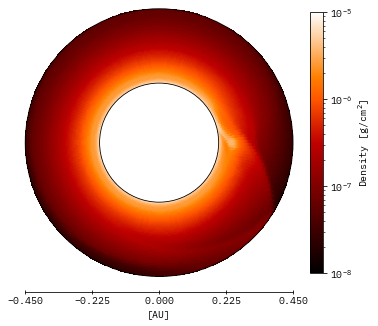

In [4]:
par_pickle_filename = '../cdi.par.pickle'
with open(par_pickle_filename, 'rb') as f:
    parameters = pickle.load(f)

sim_units_pickle_filename = '../sim_units.pickle'
with open(sim_units_pickle_filename, 'rb') as f:
    sim_units = pickle.load(f)

data_folder = '/Users/jsn/landing/data/'
latest_run_folder = sorted(glob(os.path.join(data_folder,'cdi_*')))[-1]

print('Latest run folder -> {}'.format(latest_run_folder))

data_files = glob(os.path.join(latest_run_folder,'gasdens*.dat'))

for el in data_files:
    if 'gasdens0_2d.dat' in el:
        data_files.remove(el)

#for i in range(len(data_files)):
i = 10
data_filename = 'gasdens{}.dat'.format(i)
data_path = os.path.join(latest_run_folder, data_filename)

phi, r, density = read_fargo_data(data_path, parameters, sim_units)
fig, img = plot_disk(r, phi, density)